In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('gmGeo.csv')

### RFE:  Recursive Feature Elimination

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
dataset = df.drop(columns=['Unnamed: 0','playDispNm','teamAbbr','Team','Arena','opptAbbr','Geo_loc','pre_Geo'])

In [4]:
dataset.fillna(0,inplace=True)

In [5]:
bool_cols = dataset.select_dtypes(include='bool').columns

In [6]:
dataset[bool_cols] = dataset[bool_cols].astype(int)

In [7]:
dataset[:5]

,next_gmDays,pre_gmDays,gmTime,teamDayOff,playMin,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptDayOff,gmYear,gmMonth,gmWeek,gmDay,gmDayofweek,gmDayofyear,gmIs_month_end,gmIs_month_start,gmIs_quarter_end,gmIs_quarter_start,gmIs_year_end,gmIs_year_start,gmElapsed,playBYear,playBMonth,playBWeek,playBDay,playBDayofweek,playBDayofyear,playBIs_month_end,playBIs_month_start,playBIs_quarter_end,playBIs_quarter_start,playBIs_year_end,playBIs_year_start,playBElapsed,IsStarter,teamConfIsEast,opptConfIsEast,teamRsltIsWin,opptRsltltIsWin,teamLocIsHome,opptLocIsHome,playPos_C,playPos_F,playPos_G,playPos_PF,playPos_PG,playPos_SF,playPos_SG,teamDiv_Atlantic,teamDiv_Central,teamDiv_Northwest,teamDiv_Pacific,teamDiv_Southeast,teamDiv_Southwest,opptDiv_Atlantic,opptDiv_Central,opptDiv_Northwest,opptDiv_Pacific,opptDiv_Southeast,opptDiv_Southwest,age,Seats,Year_Open,pre_gm_miles
0,1,2,3,1,16,81,220,5,1,0,0,0,1,4,2,0.5000,1,1,1.0000,3,1,0.3333,0,0,0.0,1,1,2,1,2018,4,14,8,6,98,0,0,0,0,0,0,1523145600,1990,5,20,16,2,136,0,0,0,0,0,0,642816000,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,31.0,18119,2004,0.000000
1,2,2,7,2,26,78,210,14,1,0,1,0,0,8,5,0.6250,3,2,0.6667,5,3,0.6000,2,1,0.5,0,2,2,1,2018,3,11,15,3,74,0,0,0,0,0,0,1521072000,1992,10,43,21,2,295,0,0,0,0,0,0,719625600,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,35.0,18118,1999,336.553712
2,2,2,7,1,32,78,210,20,1,0,2,0,0,17,8,0.4706,11,6,0.5455,6,2,0.3333,4,2,0.5,0,4,4,2,2018,3,13,30,4,89,0,0,0,0,0,0,1522368000,1992,10,43,21,2,295,0,0,0,0,0,0,719625600,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,36.0,18118,1999,0.000000
3,2,2,6,1,23,78,210,4,2,2,0,0,0,7,2,0.2857,5,2,0.4000,2,0,0.0000,0,0,0.0,1,3,4,1,2018,4,13,1,6,91,0,1,0,1,0,0,1522540800,1992,10,43,21,2,295,0,0,0,0,0,0,719625600,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,38.0,18118,1999,0.000000
4,2,1,7,1,23,78,210,15,1,3,1,0,2,13,7,0.5385,10,6,0.6000,3,1,0.3333,1,0,0.0,2,2,4,1,2018,4,14,4,2,94,0,0,0,0,0,0,1522800000,1992,10,43,21,2,295,0,0,0,0,0,0,719625600,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,26.0,18118,1999,0.000000


In [8]:
#dataset.to_csv('NBAPlayer_dataset.csv')

In [78]:
dataset.columns

Index(['next_gmDays', 'pre_gmDays', 'gmTime', 'teamDayOff', 'playMin',
       'playHeight', 'playWeight', 'playPTS', 'playAST', 'playTO', 'playSTL',
       'playBLK', 'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA',
       'play2PM', 'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA',
       'playFTM', 'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptDayOff',
       'gmYear', 'gmMonth', 'gmWeek', 'gmDay', 'gmDayofweek', 'gmDayofyear',
       'gmIs_month_end', 'gmIs_month_start', 'gmIs_quarter_end',
       'gmIs_quarter_start', 'gmIs_year_end', 'gmIs_year_start', 'gmElapsed',
       'playBYear', 'playBMonth', 'playBWeek', 'playBDay', 'playBDayofweek',
       'playBDayofyear', 'playBIs_month_end', 'playBIs_month_start',
       'playBIs_quarter_end', 'playBIs_quarter_start', 'playBIs_year_end',
       'playBIs_year_start', 'playBElapsed', 'IsStarter', 'teamConfIsEast',
       'opptConfIsEast', 'teamRsltIsWin', 'opptRsltltIsWin', 'teamLocIsHome',
       'opptLocIsHome', 'playPos_C'

In [79]:
#get rid of playmin
feature_name = ['next_gmDays', 'pre_gmDays', 'gmTime', 'teamDayOff',
       'playHeight', 'playWeight', 'playPTS', 'playAST', 'playTO', 'playSTL',
       'playBLK', 'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA',
       'play2PM', 'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA',
       'playFTM', 'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptDayOff',
       'gmYear', 'gmMonth', 'gmWeek', 'gmDay', 'gmDayofweek', 'gmDayofyear',
       'gmIs_month_end', 'gmIs_month_start', 'gmIs_quarter_end',
       'gmIs_quarter_start', 'gmIs_year_end', 'gmIs_year_start', 'gmElapsed',
       'playBYear', 'playBMonth', 'playBWeek', 'playBDay', 'playBDayofweek',
       'playBDayofyear', 'playBIs_month_end', 'playBIs_month_start',
       'playBIs_quarter_end', 'playBIs_quarter_start', 'playBIs_year_end',
       'playBIs_year_start', 'playBElapsed', 'IsStarter', 'teamConfIsEast',
       'opptConfIsEast', 'teamRsltIsWin', 'opptRsltltIsWin', 'teamLocIsHome',
       'opptLocIsHome', 'playPos_C', 'playPos_F', 'playPos_G', 'playPos_PF',
       'playPos_PG', 'playPos_SF', 'playPos_SG', 'teamDiv_Atlantic',
       'teamDiv_Central', 'teamDiv_Northwest', 'teamDiv_Pacific',
       'teamDiv_Southeast', 'teamDiv_Southwest', 'opptDiv_Atlantic',
       'opptDiv_Central', 'opptDiv_Northwest', 'opptDiv_Pacific',
       'opptDiv_Southeast', 'opptDiv_Southwest', 'age', 'Seats', 'Year_Open','pre_gm_miles']

In [80]:
feature_name

['next_gmDays',
 'pre_gmDays',
 'gmTime',
 'teamDayOff',
 'playHeight',
 'playWeight',
 'playPTS',
 'playAST',
 'playTO',
 'playSTL',
 'playBLK',
 'playPF',
 'playFGA',
 'playFGM',
 'playFG%',
 'play2PA',
 'play2PM',
 'play2P%',
 'play3PA',
 'play3PM',
 'play3P%',
 'playFTA',
 'playFTM',
 'playFT%',
 'playORB',
 'playDRB',
 'playTRB',
 'opptDayOff',
 'gmYear',
 'gmMonth',
 'gmWeek',
 'gmDay',
 'gmDayofweek',
 'gmDayofyear',
 'gmIs_month_end',
 'gmIs_month_start',
 'gmIs_quarter_end',
 'gmIs_quarter_start',
 'gmIs_year_end',
 'gmIs_year_start',
 'gmElapsed',
 'playBYear',
 'playBMonth',
 'playBWeek',
 'playBDay',
 'playBDayofweek',
 'playBDayofyear',
 'playBIs_month_end',
 'playBIs_month_start',
 'playBIs_quarter_end',
 'playBIs_quarter_start',
 'playBIs_year_end',
 'playBIs_year_start',
 'playBElapsed',
 'IsStarter',
 'teamConfIsEast',
 'opptConfIsEast',
 'teamRsltIsWin',
 'opptRsltltIsWin',
 'teamLocIsHome',
 'opptLocIsHome',
 'playPos_C',
 'playPos_F',
 'playPos_G',
 'playPos_PF',
 '

In [81]:
num_features = len(feature_name)

In [82]:
from sklearn.model_selection import train_test_split
X = dataset[feature_name]
y = dataset['playMin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

In [83]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

estimator = LinearRegression(n_jobs = -1)
rfe = RFE(estimator, num_features, step = 1)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35 µs


In [84]:
dataset[feature_name].shape

(154014, 84)

In [85]:
selected_data = rfe.fit_transform(dataset[feature_name], dataset['playMin'])

In [86]:
type(selected_data)

numpy.ndarray

In [87]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [88]:
np.array(feature_name)[rfe.support_]

array(['next_gmDays', 'pre_gmDays', 'gmTime', 'teamDayOff', 'playHeight',
       'playWeight', 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptDayOff', 'gmYear',
       'gmMonth', 'gmWeek', 'gmDay', 'gmDayofweek', 'gmDayofyear',
       'gmIs_month_end', 'gmIs_month_start', 'gmIs_quarter_end',
       'gmIs_quarter_start', 'gmIs_year_end', 'gmIs_year_start',
       'gmElapsed', 'playBYear', 'playBMonth', 'playBWeek', 'playBDay',
       'playBDayofweek', 'playBDayofyear', 'playBIs_month_end',
       'playBIs_month_start', 'playBIs_quarter_end',
       'playBIs_quarter_start', 'playBIs_year_end', 'playBIs_year_start',
       'playBElapsed', 'IsStarter', 'teamConfIsEast', 'opptConfIsEast',
       'teamRsltIsWin', 'opptRsltltIsWin', 'teamLocIsHome',
       'opptLocIsHome', 'playPos_C', 'p

In [89]:
model = LinearRegression()
model.fit(selected_data, dataset['playMin'])
model.score(selected_data, dataset['playMin'])

0.8018748725678759

### RFCV: Recursive Feature EliminationCross-validation

In [90]:
data = dataset.copy()
X = data[feature_name]
y = data['playMin']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [91]:
%%time
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, num_features, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

CPU times: user 29min 9s, sys: 47 s, total: 29min 56s
Wall time: 7min 26s


In [92]:
wrapped_selectors = np.array(selectors)

In [93]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [94]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

### Choosing the correct number

In [95]:
top_selector = selectors[-3]
top_selector

array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0),
       0.5030839288890503, 3], dtype=object)

In [96]:
top_rfe = top_selector[0]
np.array(feature_name)[top_rfe.support_]

array(['playFGM', 'play2PM', 'play3PM'], dtype='<U21')

In [97]:
from sklearn.feature_selection import RFECV

In [98]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train,y_train)

In [99]:
rfecv_scores = rfe.grid_scores_
rfecv_scores

array([0.46340025, 0.54787669, 0.54941799, 0.60460084, 0.65440932,
       0.65470381, 0.65619369, 0.65776306, 0.66187319, 0.66189908,
       0.6625437 , 0.66567943, 0.71454573, 0.71969662, 0.7266873 ,
       0.72726149, 0.72801181, 0.75210956, 0.75449238, 0.77339058,
       0.77571711, 0.78129611, 0.78138951, 0.78591337, 0.7881697 ,
       0.79207971, 0.7923168 , 0.79288607, 0.79359828, 0.79440067,
       0.79514271, 0.79626752, 0.79645408, 0.79668246, 0.79670084,
       0.79727327, 0.79782312, 0.79785568, 0.79792037, 0.79828213,
       0.79840014, 0.79842184, 0.79864662, 0.79913261, 0.79935251,
       0.79953533, 0.79980845, 0.8000186 , 0.8000358 , 0.80011008,
       0.80011211, 0.80011678, 0.80014703, 0.80030641, 0.80030242,
       0.80033224, 0.80037078, 0.80051234, 0.80055802, 0.80056164,
       0.80069143, 0.80080657, 0.80081242, 0.80081348, 0.80084664,
       0.80084753, 0.8008456 , 0.80103405, 0.80104941, 0.80111258,
       0.8011125 , 0.80116479, 0.80129148, 0.80129486, 0.80130

In [100]:
from graph import plot, trace_values
trace_rfecv = trace_values(num_features, rfecv_scores)
plot([trace])

In [101]:
def feature_importances(df, estimator, df_cols = None):
    df_cols = df_cols or df.columns
    df_cols = df_cols.to_numpy()
    coefs = estimator.coef_
    abs_coefs = abs(coefs)
    paired = np.hstack((df_cols.reshape(-1, 1), coefs.reshape(-1, 1), abs_coefs.reshape(-1, 1)))
    ordered_cols = paired[paired[:, -1].argsort()][::-1]
    return ordered_cols

In [102]:
feature_scores = feature_importances(X_train,model)
feature_scores[:40]

array([['gmYear', -32.16897871952682, 32.16897871952682],
       ['playFGM', -8.272202668686669, 8.272202668686669],
       ['play3PM', -6.623052203364438, 6.623052203364438],
       ['playFTM', -5.2816590998910575, 5.2816590998910575],
       ['IsStarter', 5.06571119262294, 5.06571119262294],
       ['playPTS', 4.767016303594603, 4.767016303594603],
       ['playBMonth', 3.6177184945571694, 3.6177184945571694],
       ['playBYear', -3.1984308697689947, 3.1984308697689947],
       ['playFG%', 2.215119646297442, 2.215119646297442],
       ['play3P%', 2.092284926616057, 2.092284926616057],
       ['play2P%', 1.9275353562664899, 1.9275353562664899],
       ['playFT%', 1.857781421713268, 1.857781421713268],
       ['play2PM', -1.6491609634122777, 1.6491609634122777],
       ['playBIs_quarter_end', 1.3173655416658188, 1.3173655416658188],
       ['playBIs_year_end', -1.1821844606923204, 1.1821844606923204],
       ['playPos_F', -1.1211567347990163, 1.1211567347990163],
       ['playPos_SF',

### The spearman correlation

Select the top 13 features

In [103]:
from sklearn.model_selection import train_test_split
X = dataset[feature_name]
y = dataset['playMin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
estimator = LinearRegression(n_jobs=-1)
rfe2 = RFE(estimator, 13)
X_train_rfe = rfe2.fit_transform(X_train,y_train)

In [105]:
estimator.fit(X_train_rfe, y_train)
x_test_rfe = rfe2.transform(X_test)
estimator.score(x_test_rfe, y_test)

0.72857912247918

In [106]:
selected_columns = X.columns[rfe2.support_]
selected_columns

Index(['playPTS', 'playFGA', 'playFGM', 'playFG%', 'play2PM', 'play2P%',
       'play3PM', 'play3P%', 'playFTM', 'playFT%', 'playBIs_quarter_end',
       'IsStarter', 'playPos_F'],
      dtype='object')

In [107]:
reduced_X=dataset[selected_columns]

In [108]:
df_reduced = pd.DataFrame(reduced_X, columns = selected_columns)

In [109]:
df_reduced.head()

,playPTS,playFGA,playFGM,playFG%,play2PM,play2P%,play3PM,play3P%,playFTM,playFT%,playBIs_quarter_end,IsStarter,playPos_F
0,5,4,2,0.5000,1,1.0000,1,0.3333,0,0.0,0,0,0
1,14,8,5,0.6250,2,0.6667,3,0.6000,1,0.5,0,0,0
2,20,17,8,0.4706,6,0.5455,2,0.3333,2,0.5,0,1,0
3,4,7,2,0.2857,2,0.4000,0,0.0000,0,0.0,0,1,0
4,15,13,7,0.5385,6,0.6000,1,0.3333,0,0.0,0,1,0


In [110]:
#This plot doesn't work
# %%time
# pd.plotting.scatter_matrix(df_reduced)
# print('scatter matrix')

### Exploring Correlations

In [111]:
df_reduced.corr(method = 'pearson')

,playPTS,playFGA,playFGM,playFG%,play2PM,play2P%,play3PM,play3P%,playFTM,playFT%,playBIs_quarter_end,IsStarter,playPos_F
playPTS,1.000000,0.877576,0.959178,0.449577,0.822213,0.395342,0.565533,0.376951,0.658985,0.508305,-0.024077,0.484584,-0.015369
playFGA,0.877576,1.000000,0.879295,0.204417,0.782572,0.222051,0.457556,0.243203,0.501445,0.410444,-0.022325,0.532916,-0.016482
playFGM,0.959178,0.879295,1.000000,0.505021,0.909490,0.463867,0.479216,0.319082,0.457851,0.378233,-0.026109,0.479658,-0.014217
playFG%,0.449577,0.204417,0.505021,1.000000,0.474557,0.811829,0.209828,0.302075,0.127929,0.152946,-0.017353,0.147290,-0.006207
play2PM,0.822213,0.782572,0.909490,0.474557,1.000000,0.503650,0.070961,0.021271,0.440805,0.353637,-0.041146,0.449482,-0.012488
play2P%,0.395342,0.222051,0.463867,0.811829,0.503650,1.000000,0.049663,0.025611,0.134227,0.163769,-0.006515,0.152198,-0.003869
play3PM,0.565533,0.457556,0.479216,0.209828,0.070961,0.049663,1.000000,0.720688,0.167908,0.160907,0.024224,0.201912,-0.007747
play3P%,0.376951,0.243203,0.319082,0.302075,0.021271,0.025611,0.720688,1.000000,0.083364,0.096606,0.007474,0.098668,-0.003701
playFTM,0.658985,0.501445,0.457851,0.127929,0.440805,0.134227,0.167908,0.083364,1.000000,0.688895,-0.028571,0.319800,-0.012010
playFT%,0.508305,0.410444,0.378233,0.152946,0.353637,0.163769,0.160907,0.096606,0.688895,1.000000,-0.020184,0.265258,-0.008348


playFGM & playPTS has the highest correlation: 0.959178

In [112]:
from graph import trace_values, plot
trace = trace_values(df_reduced.playFGM, df_reduced.playPTS)
#plot([trace], layout = {'xaxis': {'title': 'playFGM'}, 'yaxis': {'title': 'playPTS'}})

In [113]:
df_reduced.playFGM.min()

0

In [114]:
df_reduced.loc[0, 'playFGM']

2

In [115]:
df_reduced.playFGM.rank()[:4]

0     53554.5
1    108806.5
2    139607.5
3     53554.5
Name: playFGM, dtype: float64

In [116]:
df_reduced.playPTS.rank()[:4]

0     50283.5
1    112754.5
2    136471.5
3     41874.5
Name: playPTS, dtype: float64

In [117]:
from graph import trace_values, plot
trace = trace_values(df_reduced.playPTS.rank(), df_reduced.playPTS.rank())
#plot([trace], layout = {'xaxis': {'title': 'playFGM'}, 'yaxis': {'title': 'playPTS'}})

In [118]:
from scipy.stats import pearsonr
pearsonr(df_reduced.playPTS.rank(), df_reduced.playFGM.rank())[0]

0.9663654722652325

In [119]:
from scipy.stats import spearmanr
spearmanr(df_reduced.playPTS, df_reduced.playFGM)[0]

0.966365472265235

### Switching to Spearman Correlation

In [120]:
df_reduced.corr(method = 'spearman')

,playPTS,playFGA,playFGM,playFG%,play2PM,play2P%,play3PM,play3P%,playFTM,playFT%,playBIs_quarter_end,IsStarter,playPos_F
playPTS,1.000000,0.881948,0.966365,0.547689,0.834450,0.473551,0.534315,0.462899,0.630530,0.526072,-0.023372,0.500551,-0.016230
playFGA,0.881948,1.000000,0.881179,0.231790,0.782440,0.251988,0.461550,0.355012,0.494132,0.412662,-0.019876,0.547257,-0.016983
playFGM,0.966365,0.881179,1.000000,0.607248,0.905984,0.549047,0.465405,0.400460,0.464074,0.386164,-0.024916,0.493383,-0.015090
playFG%,0.547689,0.231790,0.607248,1.000000,0.583101,0.821184,0.220392,0.273412,0.165981,0.149794,-0.018542,0.147894,-0.006106
play2PM,0.834450,0.782440,0.905984,0.583101,1.000000,0.634510,0.103600,0.070738,0.455121,0.369430,-0.041328,0.462398,-0.013329
play2P%,0.473551,0.251988,0.549047,0.821184,0.634510,1.000000,0.045830,0.032221,0.173720,0.162072,-0.007447,0.152497,-0.004062
play3PM,0.534315,0.461550,0.465405,0.220392,0.103600,0.045830,1.000000,0.941694,0.161296,0.162886,0.021401,0.198403,-0.006846
play3P%,0.462899,0.355012,0.400460,0.273412,0.070738,0.032221,0.941694,1.000000,0.119491,0.127131,0.012644,0.142250,-0.005053
playFTM,0.630530,0.494132,0.464074,0.165981,0.455121,0.173720,0.161296,0.119491,1.000000,0.873409,-0.028771,0.330029,-0.010648
playFT%,0.526072,0.412662,0.386164,0.149794,0.369430,0.162072,0.162886,0.127131,0.873409,1.000000,-0.019137,0.257853,-0.008367


In [121]:
#This plot doesn't work
# df = pd.DataFrame(reduced_X, columns = selected_columns)
# plot = pd.plotting.scatter_matrix(df.rank())
# print('hola')

### Working with Dendrograms

In [122]:
#This plot doesn't work
# %%time
# plot = pd.plotting.scatter_matrix(data.rank())

CPU times: user 1.52 s, sys: 18.6 ms, total: 1.54 s
Wall time: 1.55 s


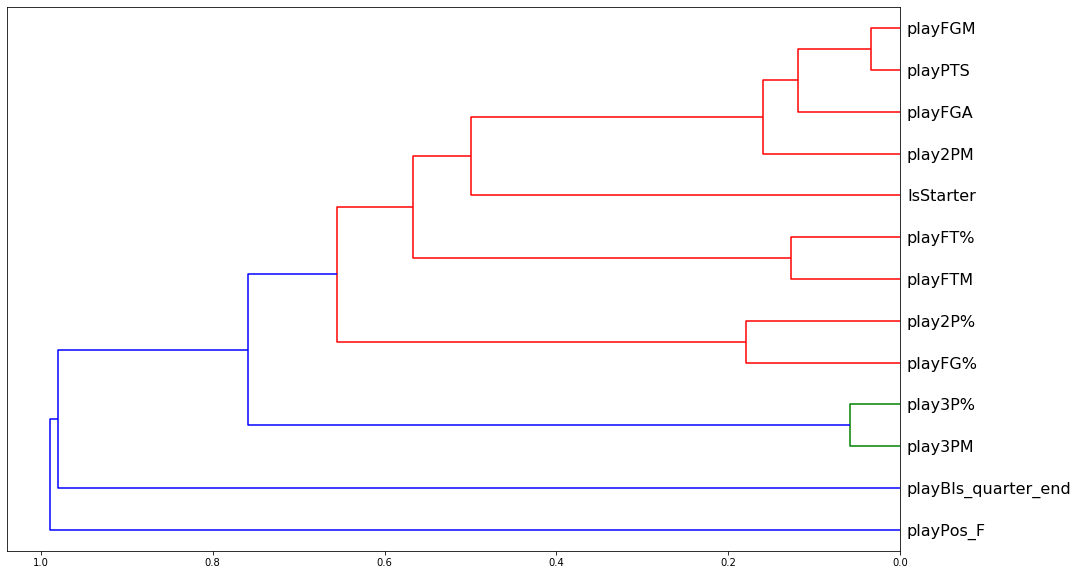

In [123]:
%%time
import scipy.cluster.hierarchy as hc
corr = df_reduced.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = selected_columns, orientation = 'left', leaf_font_size=16)

### Removing Features

Remove playFGM

In [124]:
removed_LSTAT_X = reduced_X.drop(columns='playFGM')

X_train_removed_L, X_test_removed_L, y_train_removed_L, y_test_removed_L = train_test_split(removed_LSTAT_X , y, test_size=0.33, random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_removed_L, y_train_removed_L)
model.score(X_test_removed_L, y_test_removed_L)

0.72857912247918

In [126]:
first_half = reduced_X.iloc[:,:3]
second_half = reduced_X.iloc[:,:4]
combined = np.column_stack((first_half, second_half))

In [127]:
X_train_wo_dis, X_test_wo_dis, y_train_wo_dis, y_test_wo_dis = train_test_split(combined , y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_wo_dis, y_train_wo_dis)
model.score(X_test_wo_dis, y_test_wo_dis)

0.6474851587698531

In [128]:
first_half = reduced_X.iloc[:, :2]
second_half = reduced_X.iloc[:, 3:]
combined_wo_rm = np.column_stack((first_half, second_half))

X_train_wo_rm, X_test_wo_rm, y_train_wo_rm, y_test_wo_rm = train_test_split(combined_wo_rm , y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_wo_rm, y_train_wo_rm)
model.score(X_test_wo_rm, y_test_wo_rm)

0.72857912247918

### The point of it all

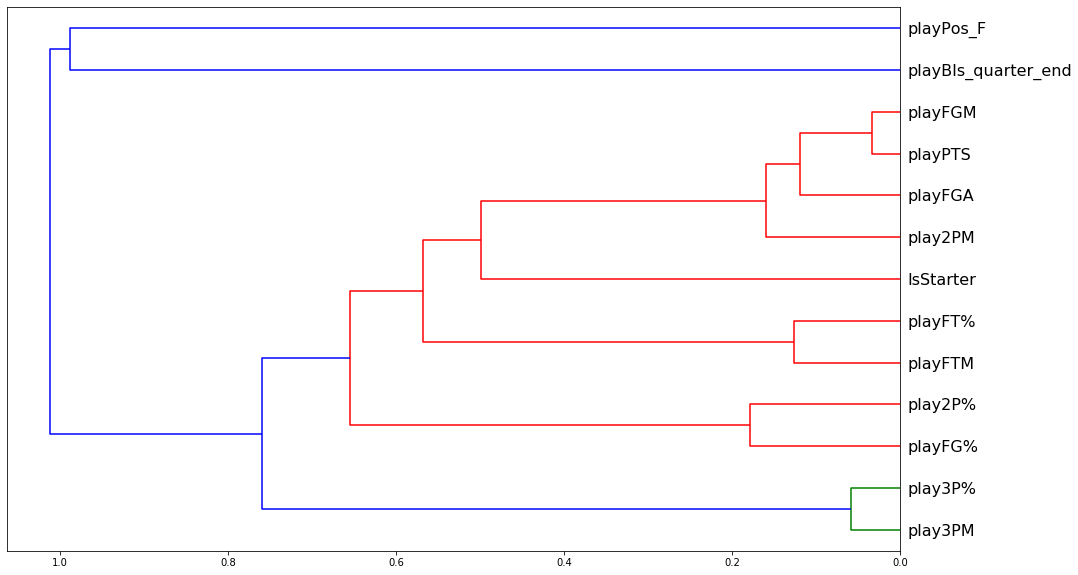

In [129]:
import scipy.cluster.hierarchy as hc
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = selected_columns, orientation = 'left', leaf_font_size=16)

## Final Model

After the analysis of the NBA2012-18_playerBoxScore, we could identify a set of core features that drive the minutes that players play on the court each game(playmin).

I have identified some key factors of changing the playmin: 3 point shooting rate and 3 points made by a player, Points scored by a player, etc.. Those are expected and looks reasonable. Basically a player could have higher playmin if they have better score ability especially on field goal and 3 points.  However, some features are very interesting. For example, the position forward is also an important feature to predict playmin. We could even notice the gap between Power Forward and Small Forward is getting smaller. Players like Luka Dončić, Dirk Nowitzki, Lebron James and Kevin Durant who are tall, fast, strong and able to shoot are very effective on the court.

The further question of the dataset could be what kind of player would increase their playmin faster than other players?

In addition to team location, I import a third party database of NBA Arenas name and then use GeoPy to get their latitude and longitude. After that, I could calculate the distance players came from the last game, which should help to measure their tiredness of transportation. Similarity, I also get the days since last game and days until next game.